<a href="https://colab.research.google.com/github/Madhur-1/ERA-v1/blob/master/Session_4_fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CODE BLOCK: 1

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from model import Net
from utils import train, test

CODE BLOCK: 2

In [ ]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

CODE BLOCK: 3

In [ ]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [ ]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 91430047.58it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 129418476.31it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27602949.51it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4610486.15it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



CODE BLOCK: 5

In [ ]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(train_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

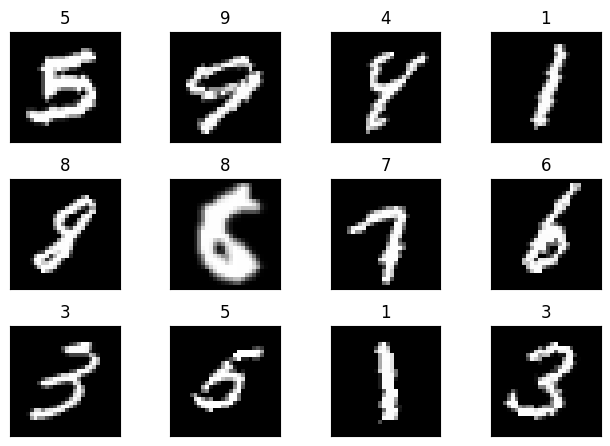

In [ ]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 10

In [ ]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=10.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, train_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.3130 Batch_id=117 Accuracy=72.33: 100%|██████████| 118/118 [00:25<00:00,  4.63it/s]


Test set: Average loss: 0.2189, Accuracy: 9645/10000 (96.45%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1857 Batch_id=117 Accuracy=95.91: 100%|██████████| 118/118 [00:25<00:00,  4.63it/s]


Test set: Average loss: 0.0869, Accuracy: 9800/10000 (98.00%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1129 Batch_id=117 Accuracy=97.09: 100%|██████████| 118/118 [00:25<00:00,  4.64it/s]


Test set: Average loss: 0.0528, Accuracy: 9882/10000 (98.82%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1100 Batch_id=117 Accuracy=97.57: 100%|██████████| 118/118 [00:25<00:00,  4.63it/s]


Test set: Average loss: 0.0429, Accuracy: 9895/10000 (98.95%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0491 Batch_id=117 Accuracy=97.98: 100%|██████████| 118/118 [00:25<00:00,  4.67it/s]


Test set: Average loss: 0.0456, Accuracy: 9868/10000 (98.68%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1447 Batch_id=117 Accuracy=98.12: 100%|██████████| 118/118 [00:26<00:00,  4.43it/s]


Test set: Average loss: 0.0353, Accuracy: 9904/10000 (99.04%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0663 Batch_id=117 Accuracy=98.19: 100%|██████████| 118/118 [00:29<00:00,  3.98it/s]


Test set: Average loss: 0.0339, Accuracy: 9908/10000 (99.08%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0555 Batch_id=117 Accuracy=98.37: 100%|██████████| 118/118 [00:29<00:00,  4.03it/s]


Test set: Average loss: 0.0290, Accuracy: 9920/10000 (99.20%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0154 Batch_id=117 Accuracy=98.43: 100%|██████████| 118/118 [00:25<00:00,  4.66it/s]


Test set: Average loss: 0.0268, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0441 Batch_id=117 Accuracy=98.42: 100%|██████████| 118/118 [00:25<00:00,  4.63it/s]


Test set: Average loss: 0.0273, Accuracy: 9920/10000 (99.20%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0154 Batch_id=117 Accuracy=98.59: 100%|██████████| 118/118 [00:25<00:00,  4.55it/s]


Test set: Average loss: 0.0235, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0417 Batch_id=117 Accuracy=98.60: 100%|██████████| 118/118 [00:25<00:00,  4.56it/s]


Test set: Average loss: 0.0246, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0089 Batch_id=117 Accuracy=98.55: 100%|██████████| 118/118 [00:26<00:00,  4.40it/s]


Test set: Average loss: 0.0273, Accuracy: 9912/10000 (99.12%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0317 Batch_id=117 Accuracy=98.69: 100%|██████████| 118/118 [00:28<00:00,  4.18it/s]


Test set: Average loss: 0.0240, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0129 Batch_id=117 Accuracy=98.79: 100%|██████████| 118/118 [00:28<00:00,  4.08it/s]


Test set: Average loss: 0.0263, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0381 Batch_id=117 Accuracy=98.86: 100%|██████████| 118/118 [00:30<00:00,  3.89it/s]


Test set: Average loss: 0.0199, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0462 Batch_id=117 Accuracy=98.87: 100%|██████████| 118/118 [00:27<00:00,  4.23it/s]


Test set: Average loss: 0.0194, Accuracy: 9944/10000 (99.44%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0148 Batch_id=117 Accuracy=98.97: 100%|██████████| 118/118 [00:25<00:00,  4.60it/s]


Test set: Average loss: 0.0196, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.1126 Batch_id=117 Accuracy=98.95: 100%|██████████| 118/118 [00:25<00:00,  4.55it/s]


Test set: Average loss: 0.0195, Accuracy: 9947/10000 (99.47%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0188 Batch_id=117 Accuracy=98.97: 100%|██████████| 118/118 [00:26<00:00,  4.40it/s]


Test set: Average loss: 0.0197, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 1.0000e-03.
